In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy.polynomial as pol
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline 

In [345]:
data_train = pd.read_csv('/home/hcampos/common_bioinformatics/files/csv_dataframe/xTrain/export_dataframe_TCL1_usa_117_NO.csv', index_col=False, header=0)
data_test = pd.read_csv('/home/hcampos/common_bioinformatics/files/csv_dataframe/xTest/export_dataframe_TCL1_usa_117_NO.csv', index_col=False, header=0)

x_train = data_train[['min_cov', 'min_var_freq','somatic_p']].values
y_train = data_train['n'].values

x_test = data_test[['min_cov', 'min_var_freq','somatic_p']].values
y_test = data_test['n'].values

In [346]:
poly = PolynomialFeatures(degree=3)

In [347]:
x_ = poly.fit_transform(x_train)

In [348]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(x_, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [349]:
#poly.powers_

In [337]:
df_coeff = pd.DataFrame(clf.coef_)

In [356]:
clf.coef_

array([ 3.56495289e+02, -8.22538494e+01,  2.92152794e+03, -4.66034662e+03,
        1.04613102e+01, -2.07539062e+02,  1.37423083e+03, -2.94599815e+04,
        2.35276411e+04, -1.55680632e+04, -5.58455302e-01,  1.81755553e+01,
       -1.92711935e+01,  3.83436261e+01, -3.20467808e+03, -5.76073744e+03,
        1.02150832e+05, -1.02162391e+05,  3.16825527e+05, -1.88065619e+04])

In [341]:
pred_ = poly.fit_transform(x_test)

In [342]:
y_pred = clf.predict(pred_)

In [343]:
df = pd.DataFrame({'Test': y_test, 'Model': y_pred})

In [350]:
df

Test       Model
0    307  215.475486
1    289  235.385000
2    282  249.713922
3    274  262.491310
4    267  270.366435
5    263  267.119393
6    254  274.872984
7    189  198.046504
8    236  255.987500
9    259  269.988563
10   286  273.859549
11   359  223.563660
12   387  185.785949
13   263  241.918643
14   256  228.539625
15   249  222.135555
16   235  249.865217
17   239  231.070902

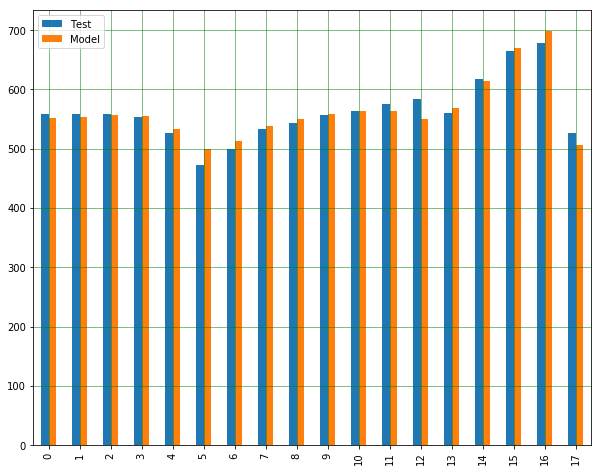

In [18]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.51517840561438
Mean Squared Error: 173.66108685264294
Root Mean Squared Error: 13.178053226961975


In [20]:
df_uy = pd.read_csv("/home/hcampos/common_bioinformatics/files/csv_dataframe/boxplot_error/samples_box_uy.csv")   
df_uy["point-error"] = abs(df_uy.actual-df_uy.predict)

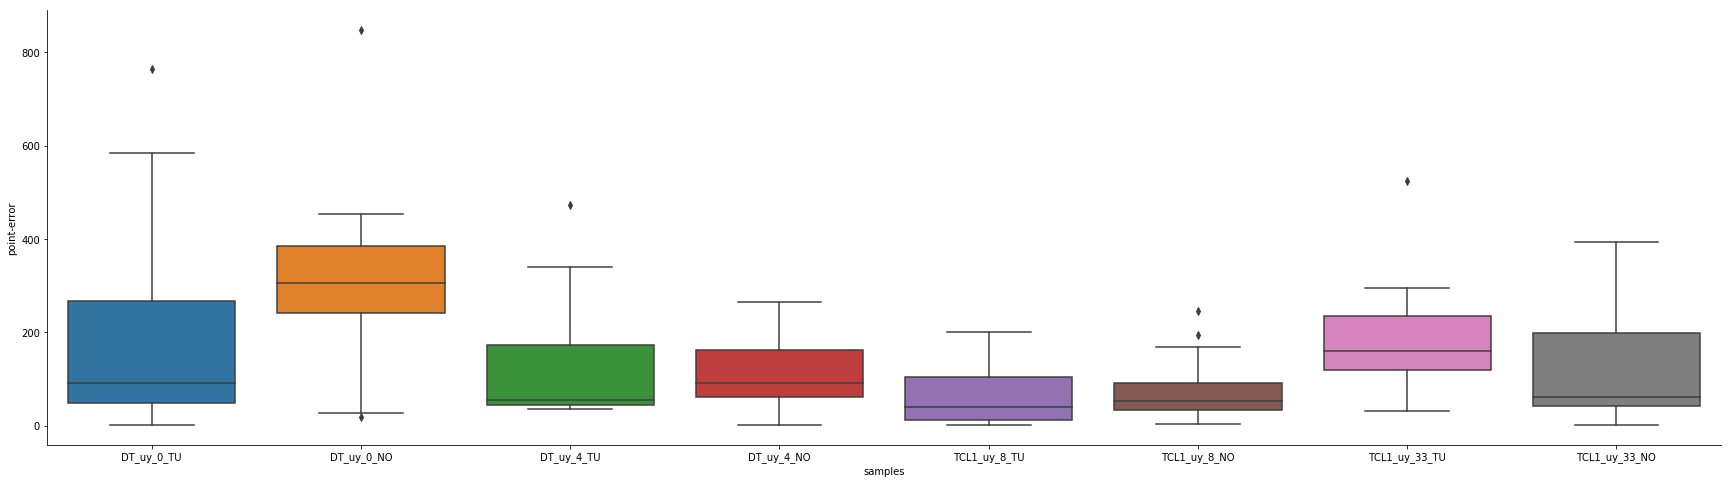

In [21]:
fig = plt.subplots(figsize=(30, 8))
sns.boxplot(data=df_uy, x = "samples", y="point-error")
sns.despine()

In [14]:
df_usa = pd.read_csv("/home/hcampos/common_bioinformatics/files/csv_dataframe/boxplot_error/samples_box_usa.csv")   
df_usa["point-error"] = abs(df_usa.actual-df_usa.predict)

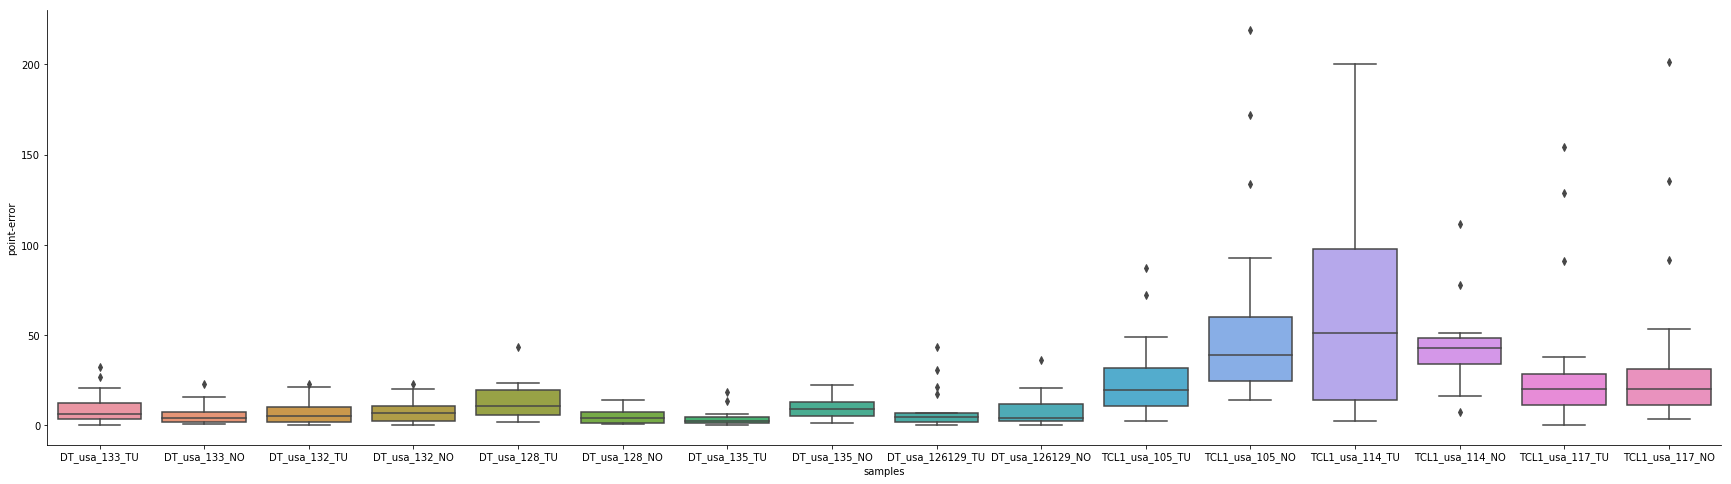

In [15]:
fig = plt.subplots(figsize=(30, 8))
sns.boxplot(data=df_usa, x = "samples", y="point-error")
sns.despine()